In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv('/content/cdml.csv')
df

,area,price
0,2600,5500000
1,3000,5650000
2,3200,6100000
3,4000,7250000
4,5000,2563000


simple linear regression for home pricing regression


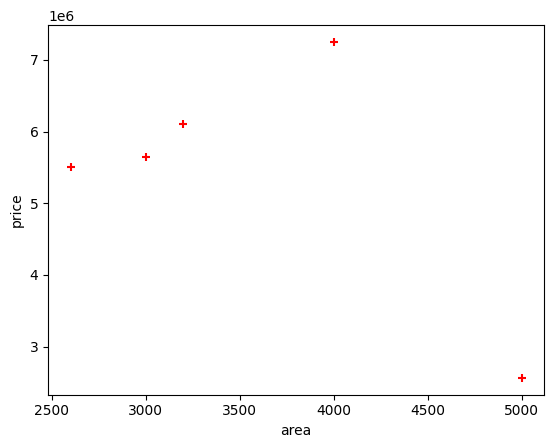

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color = 'red', marker = '+')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [ ]:
reg.coef_

array([-1035.04405286])

In [ ]:
#intercept drawn on the y axis
reg.intercept_

9097356.828193832

In [ ]:
#y = mx + c model
-1035.04405286*3300 + 9097356.828193832

5681711.453755832

In [ ]:
d = pd.read_csv('/content/cdml2.csv')
d

,area
0,1500
1,3000
2,5623
3,6532
4,5858
5,6985
6,4785
7,3214
8,1236
9,5893


In [ ]:
p = reg.predict(d)

In [ ]:
d['prices'] = p

In [ ]:
d

,area,prices
0,1500,7.544791e+06
1,3000,5.992225e+06
2,5623,3.277304e+06
3,6532,2.336449e+06
4,5858,3.034069e+06
5,6985,1.867574e+06
6,4785,4.144671e+06
7,3214,5.770725e+06
8,1236,7.818042e+06
9,5893,2.997842e+06


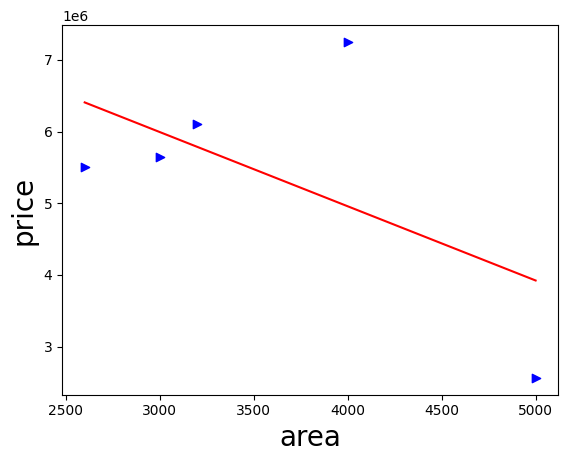

In [ ]:
%matplotlib inline
plt.xlabel('area', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.scatter(df.area, df.price, color = 'blue', marker = '>')
plt.plot(df.area, reg.predict(df[['area']]), color = 'red')

In [ ]:
#linear reg in multi var

In [ ]:
d = pd.read_csv('/content/multivar.csv')
d


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
#taking median to avoid NAN
import math
median_bedrooms = math.floor(d.bedrooms.median())

In [ ]:
median_bedrooms

3

In [ ]:
d.bedrooms = d.bedrooms.fillna(median_bedrooms)
d

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(d[['area','bedrooms','age']], d.price)

LinearRegression()

In [ ]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [ ]:
reg.intercept_

383724.9999999998

In [ ]:
137.25*3000+26025*3+6825*40+38724.99999999998


801550.0

In [ ]:
#gradient descent - selects the steepest one for optimization and even less min square error


In [ ]:
import numpy as np

def gradient_descent(x,y):
  m_curr = b_curr = 0
  itr = 10000
  n = len(x)
  learning_rate = 0.001
  for i in range(itr):
    y_pred = m_curr * x + b_curr
    cost = (1/n) * sum([val ** 2 for val in (y-y_pred)])
    md = -(2/n) * sum(x*(y-y_pred))
    bd = -(2/n) * sum(y-y_pred)
    m_curr = m_curr - learning_rate * md # slope
    b_curr = b_curr - learning_rate * bd # intercept
    print("m {}, b {},cost {}, itr {}".format(m_curr, b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,6,7,8,9])
gradient_descent(x,y)

Streaming output truncated to the last 5000 lines.
m 1.176526178363632, b 3.3626844846542037,cost 0.07398025664198658, itr 5000
m 1.176466495531707, b 3.3628999586147135,cost 0.07393024020978246, itr 5001
m 1.1764068328783213, b 3.363115359724294,cost 0.07388025759259347, itr 5002
m 1.1763471903966525, b 3.3633306880075753,cost 0.0738303087675577, itr 5003
m 1.1762875680798808, b 3.3635459434891803,cost 0.07378039371182964, itr 5004
m 1.1762279659211883, b 3.363761126193723,cost 0.07373051240257779, itr 5005
m 1.1761683839137598, b 3.3639762361458083,cost 0.0736806648169874, itr 5006
m 1.1761088220507823, b 3.364191273370034,cost 0.07363085093225873, itr 5007
m 1.1760492803254448, b 3.3644062378909894,cost 0.07358107072560695, itr 5008
m 1.1759897587309391, b 3.364621129733255,cost 0.07353132417426342, itr 5009
m 1.1759302572604589, b 3.3648359489214026,cost 0.07348161125547421, itr 5010
m 1.1758707759072002, b 3.3650506954799972,cost 0.07343193194650162, itr 5011
m 1.1758113146643618,

In [ ]:
# save a model traiined using pickle and sklearn joblib

In [ ]:
import pickle #obj serialization, dt persistance, interprocess comm


In [ ]:
with open('model_pickel','wb') as f:
  pickle.dump(reg,f)

In [ ]:
with open('model_pickel','rb') as f:
  mo = pickle.load(f)

In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(reg, 'model_jb')

['model_jb']

In [ ]:
mj = joblib.load('model_jb')


In [ ]:
mj.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [ ]:
# Dummy var and one hot encoding

In [ ]:
d = pd.read_csv('/content/carprices.csv')
d

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
d.rename(columns={'Car Model': 'Model'}, inplace=True)
d.rename(columns={'Sell Price($)': 'Price'}, inplace=True)
d.rename(columns={'Age(yrs)': 'Age'}, inplace=True)
d

,Model,Mileage,Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
dummies = pd.get_dummies(d.Model)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [ ]:
#concatenate dummy with original dataset
merged = pd.concat([d,dummies], axis = 'columns')
merged

,Model,Mileage,Price,Age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
fin = merged.drop(['Model','Mileage'], axis = 'columns')
fin

,Price,Age,Audi A5,BMW X5,Mercedez Benz C class
0,18000,6,0,1,0
1,34000,3,0,1,0
2,26100,5,0,1,0
3,40000,2,0,1,0
4,31500,4,0,1,0
5,29400,5,1,0,0
6,32000,5,1,0,0
7,19300,6,1,0,0
8,12000,8,1,0,0
9,22000,6,0,0,1


In [ ]:
d.rename(columns={'Sell Price': 'Amount'}, inplace=True)
d

,Model,Mileage,Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = fin.drop(['Price'], axis = 'columns')
X

,Age,Audi A5,BMW X5,Mercedez Benz C class
0,6,0,1,0
1,3,0,1,0
2,5,0,1,0
3,2,0,1,0
4,4,0,1,0
5,5,1,0,0
6,5,1,0,0
7,6,1,0,0
8,8,1,0,0
9,6,0,0,1


In [ ]:
Y = fin.Price
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Price, dtype: int64

In [ ]:
model = model.fit(X,Y)

In [ ]:
model.score(X,Y) #accuracy of the model with actual val and pred val

0.9315851574179888

In [ ]:
d

,Model,Mileage,Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = d
dfle.Model = le.fit_transform(dfle.Model)
dfle

,Model,Mileage,Price,Age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [ ]:
X = dfle[['Model','Age']].values
X

array([[1, 6],
       [1, 3],
       [1, 5],
       [1, 2],
       [1, 4],
       [0, 5],
       [0, 5],
       [0, 6],
       [0, 8],
       [2, 6],
       [2, 7],
       [2, 7],
       [2, 5]])

In [ ]:
Y = dfle.Price
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Price, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_columns = [0]
transform = ColumnTransformer(transformers = ['onehot',OneHotEncoder(), categorical_columns], remainder = 'passthrough')
ohe = OneHotEncoder()

In [ ]:
ohe.fit_transform(X).toarray()
X


array([[1, 6],
       [1, 3],
       [1, 5],
       [1, 2],
       [1, 4],
       [0, 5],
       [0, 5],
       [0, 6],
       [0, 8],
       [2, 6],
       [2, 7],
       [2, 7],
       [2, 5]])

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
# SPILTIING TEST AND TRAIN MODULE


In [ ]:
import pandas as pd
d = pd.read_csv('/content/carprices.csv')
d.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

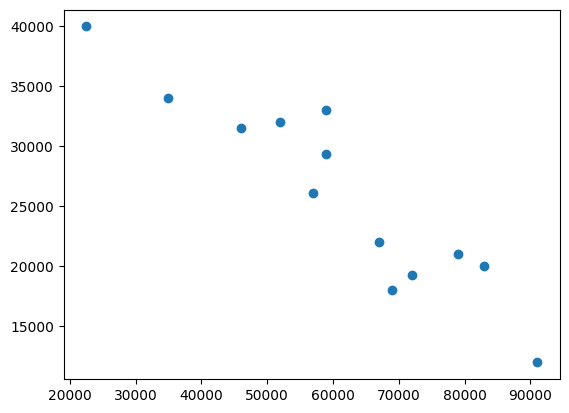

In [ ]:
plt.scatter(d['Mileage'],d['Sell Price($)'])

In [ ]:
X = d[['Mileage', 'Age(yrs)']]
Y = d[['Sell Price($)']]

In [ ]:
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [ ]:
Y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 10)

In [ ]:
len(X_train)

10

In [ ]:
len(X_test)

3

In [ ]:
X_train

,Mileage,Age(yrs)
6,52000,5
8,91000,8
2,57000,5
12,59000,5
5,59000,5
10,83000,7
1,35000,3
0,69000,6
4,46000,4
9,67000,6


In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [ ]:
clf.fit(X_train, Y_train)

LinearRegression()

In [ ]:
clf.predict(X_test)

array([[41842.49106079],
       [22531.68057211],
       [18423.93325387]])

In [ ]:
Y_test

,Sell Price($)
3,40000
7,19300
11,21000


In [ ]:
clf.score(X_test, Y_test)

0.9224816911971743

In [ ]:
#LOGISTIC REGRESSION - CLASSIFICATION (BINARY, MULTICLASS CLASSIFICATIONS)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
d = pd.read_csv('/content/insurance.csv')
d.head()

,Age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,56,1


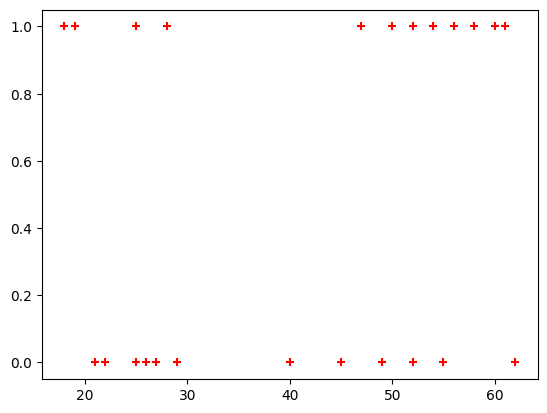

In [ ]:
plt.scatter(d.Age, d.bought_insurance, marker = '+', color = 'red')
plt.show()

In [ ]:
d.shape


(25, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(d[['Age']], d.bought_insurance, test_size  = 0.9)

[    Age
 10   27
 8    18,
     Age
 11   29
 0    22
 13   55
 4    56
 12   49
 22   50
 21   45
 6    62
 7    61
 18   21
 2    47
 14   25
 24   52
 3    52
 19   26
 20   40
 15   58
 17   18
 9    28
 23   54
 5    60
 16   19
 1    25,
 10    0
 8     1
 Name: bought_insurance, dtype: int64,
 11    0
 0     0
 13    0
 4     1
 12    0
 22    1
 21    0
 6     0
 7     1
 18    0
 2     1
 14    1
 24    1
 3     0
 19    0
 20    0
 15    1
 17    1
 9     1
 23    1
 5     1
 16    1
 1     0
 Name: bought_insurance, dtype: int64]

In [ ]:
X_test

,Mileage,Age(yrs)
3,22500,2
7,72000,6
11,79000,7


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train

,Mileage,Age(yrs)
6,52000,5
8,91000,8
2,57000,5
12,59000,5
5,59000,5
10,83000,7
1,35000,3
0,69000,6
4,46000,4
9,67000,6


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.predict(X_test)

array([12000, 12000, 12000])

In [ ]:
model.score(X_test, Y_test)

0.0

In [ ]:
model.predict_proba(X_test)

array([[0.11494152, 0.10468683, 0.11144292, 0.10364331, 0.09806163,
        0.099231  , 0.09104551, 0.09500449, 0.099231  , 0.08271178],
       [0.15189586, 0.11263524, 0.13759025, 0.10908167, 0.0913728 ,
        0.0949055 , 0.07205217, 0.08256594, 0.0949055 , 0.05299506],
       [0.15754157, 0.1134742 , 0.14133847, 0.10955218, 0.09019998,
        0.09403348, 0.06950341, 0.08070698, 0.09403348, 0.04961624]])

In [ ]:
#MULTI CLASS CLASSIFICATION OF LOGISTIC REGRESSION

In [ ]:
#somewhere similar to minist dataset

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

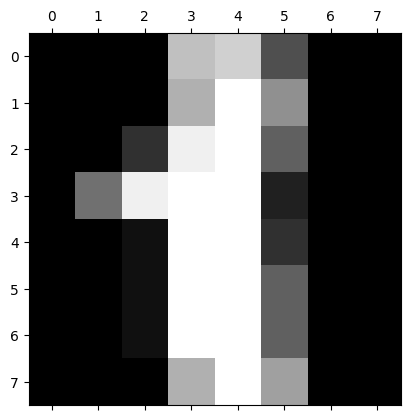

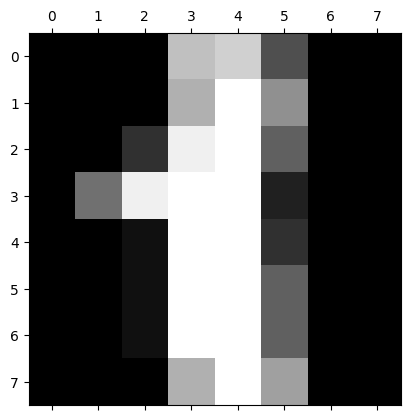

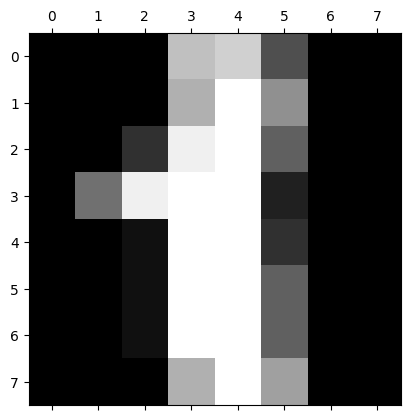

In [ ]:
plt.gray()
for i in range(3):
  plt.matshow(digits.images[1])

In [ ]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

In [ ]:
len(X_train)

1347

In [ ]:
len(X_test)

450

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test,Y_test)

0.96

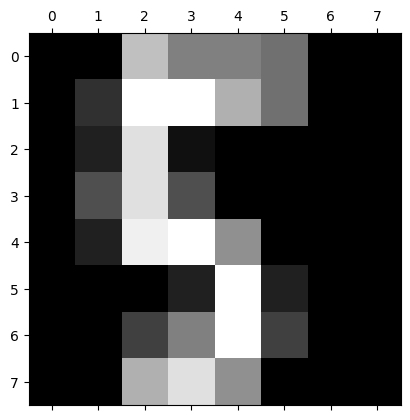

In [ ]:
plt.matshow(digits.images[25])

In [ ]:
digits.target[25]

5

In [ ]:
model.predict([digits.data[25]])

array([5])

In [ ]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [ ]:
#SUPPORT VECTOR MACHINE
# exercise random forest using same dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [ ]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [ ]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


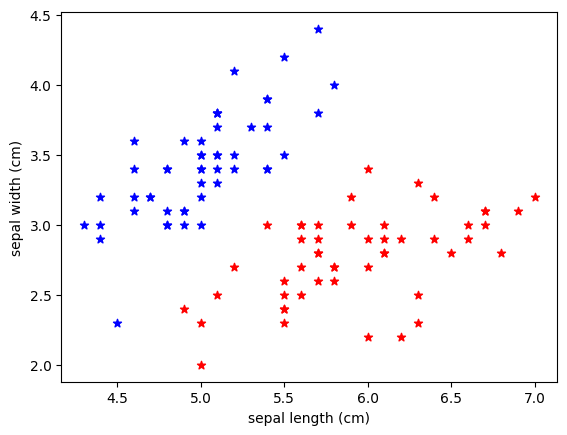

In [ ]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'blue', marker = '*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', marker = '*')

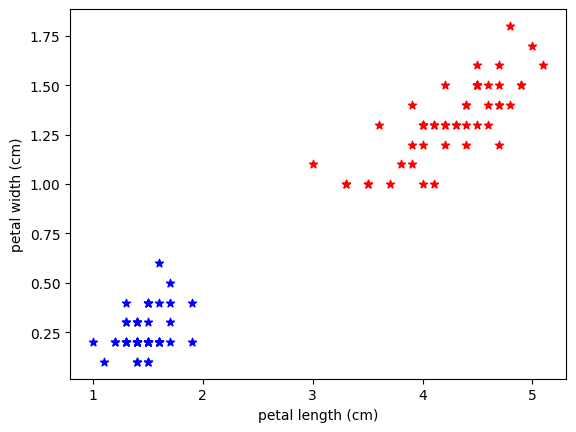

In [ ]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'blue', marker = '*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'red', marker = '*')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['target','flower_name'], axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
len(x_train)

120

In [ ]:
len(x_test
    )

30

In [ ]:
from sklearn.svm import SVC
model = SVC(C  = 10)

In [ ]:
model.fit(x_train, y_train)

SVC(C=10)

In [ ]:
model.score(x_test, y_test)

0.9

In [ ]:
#random forest (exe) using iris

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fix(x_train, y_train)

AttributeError: ignored

In [ ]:
# RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

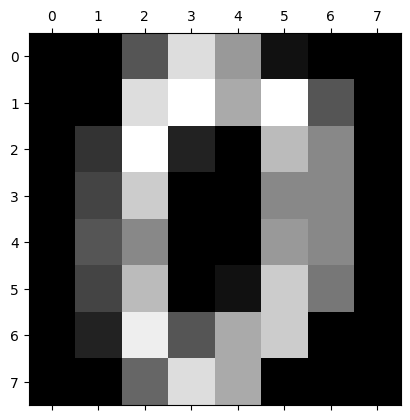

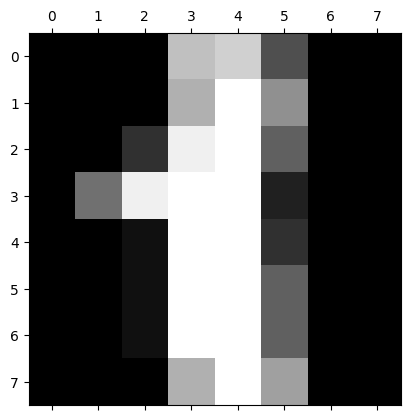

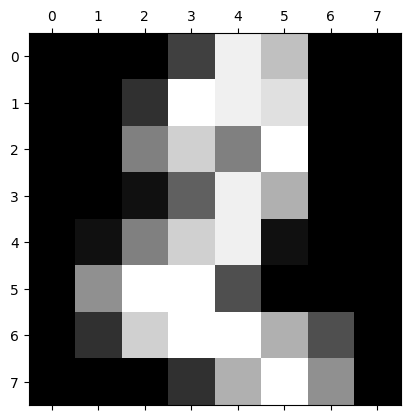

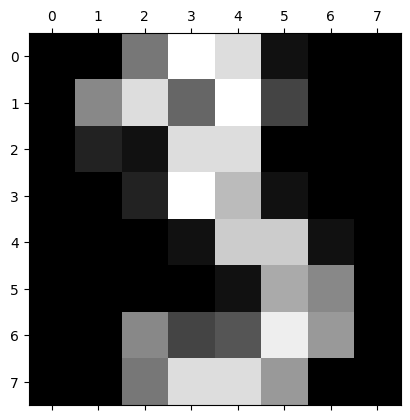

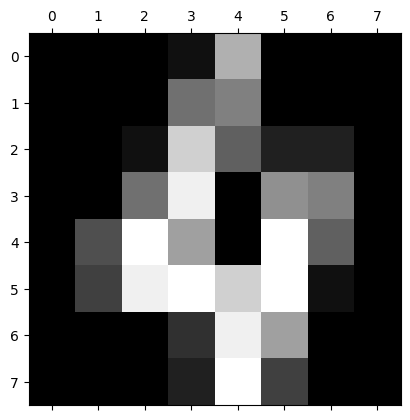

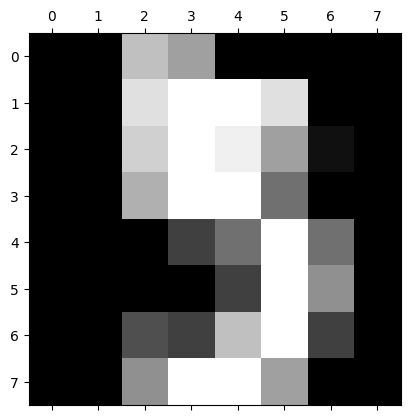

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(6):
  plt.matshow(digits.images[i])

In [ ]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
df = pd.DataFrame(digits.data)
df.head(

)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['target'], axis = 'columns'), digits.target, test_size = 0.2)

In [ ]:
len(X_train)

1437

In [ ]:
len(X_test)

360

In [ ]:
#ensemble is used when multiple algo's are used.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test, Y_test)

0.9666666666666667

In [ ]:
#confusoin matrix
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[29,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  1,  0,  2,  1,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 32]])

Text(95.72222222222221, 0.5, 'Trueth')

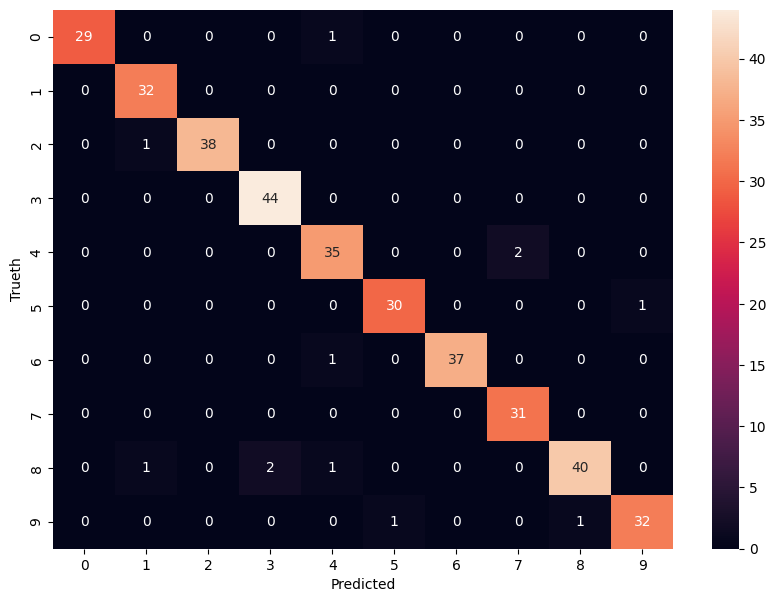

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Trueth')

In [ ]:
#Exe
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
x = iris.data
y = iris.target
